### Introduction

This project aims to predict the customers who are likely to churn from an international bank (binary classification problem, using ensemble learning model). The model is trained on the Kaggle bank churn dataset. This dataset consists of 10000 customer information with 13 columns/attributes.

### Importing libraries




In [ ]:
import os
import numpy as np
from numpy import median
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib.colors import ListedColormap
import seaborn as sns
%matplotlib inline

### Reading dataset

In [ ]:
#load data from Churn_Modelling.csv
inputPath = "Churn_Modelling.csv"
df = pd.read_csv(inputPath)

*pd.read_csv : to read a comma-separated values (csv) file into DataFrame*

### Dataset Information

In [ ]:
#display or return top n (5 by default) rows of a data frame
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**About Dataset columns :**

* CustomerId: Unique ID which is assigned to each customer
* Surname: Last name of the customer
* CreditScore: It defines the credit history of the customer
* Geography: A customer’s location
* Gender: It defines the gender of the customer
* Age: Age of the customer
* Tenure: Number of years for which the customer has been with the bank
* NumOfProducts: It refers to the number of products that a customer has purchased through the bank
* Balance: Account balance
* HasCrCard: It is a categorical variable that decides whether the customer has a credit card or not
* EstimatedSalary: Estimated salary of the customer in dollars
* IsActiveMember: It is a categorical variable that decides whether the customer is an active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions, etc)
* Exited: It is a categorical variable that decides whether the customer left the bank within six months or not. It can take two values 0 = No ( Customer did not leave the bank) 1 = Yes (Customer left the bank)


In [ ]:
#Total no of training examples
total=len(df.Exited)
print("Total no of training examples:",total)

Total no of training examples: 10000


In [ ]:
#to get the dimension of the DataFrame
df.shape

(10000, 13)

Dataset is having 10000 rows (examples) and 13 columns.

### Exploratory Data Analysis

In [ ]:
#.info()- to get a concise summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


*   There are 3 categorical features (Surname, Geography and Gender).



In [ ]:
#Checking for unique value in the data attributes
df.nunique()

CustomerId         10000
Surname             2933
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [ ]:
#Finding the duplicates
df.duplicated().sum()

0



The function returned ‘0’. This means, there is not a single duplicate value present in our dataset. Good!


In [ ]:
#Find null values
df.isnull().sum().to_frame('Number of Nulls')

,Number of Nulls
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0


Yay, we have no null values too! 

In [ ]:
#gives basic statistics about our data
df.describe(include='all').transpose() #to include the categorical data
#df.describe()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CustomerId,10000.0,NaN,NaN,NaN,15690940.5694,71936.186123,15565701.0,15628528.25,15690738.0,15753233.75,15815690.0
Surname,10000,2933,Smith,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CreditScore,10000.0,NaN,NaN,NaN,650.5288,96.653299,350.0,584.0,652.0,718.0,850.0
Geography,10000,3,France,5014,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,10000,2,Male,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,10000.0,NaN,NaN,NaN,38.9218,10.487806,18.0,32.0,37.0,44.0,92.0
Tenure,10000.0,NaN,NaN,NaN,5.0128,2.892174,0.0,3.0,5.0,7.0,10.0
Balance,10000.0,NaN,NaN,NaN,76485.889288,62397.405202,0.0,0.0,97198.54,127644.24,250898.09
NumOfProducts,10000.0,NaN,NaN,NaN,1.5302,0.581654,1.0,1.0,1.0,2.0,4.0
HasCrCard,10000.0,NaN,NaN,NaN,0.7055,0.45584,0.0,0.0,1.0,1.0,1.0


In [ ]:
#gives counts of unique rows in the 'Geography'
df.Geography.value_counts()  

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [ ]:
df.Gender.value_counts()  

Male      5457
Female    4543
Name: Gender, dtype: int64

**Observation**
* 'Geography' data shows that around 50% of the customers are from France.
* 'Gender' data shows that most records are for Male customers.


In [ ]:
df.Exited.value_counts()  

0    7963
1    2037
Name: Exited, dtype: int64

***The value 1 represents the customers who exited the bank and 0 represents the customers who are continuing with the bank services***


**Observation**

Here, the dataset is unbalanced.
The dataset should be balanced i.e. count of label ones and zeroes shud be same otherwise model can make baised prediction (can be baised based on max of samples available).Here count of label 0 is more so model can be baised towards it.

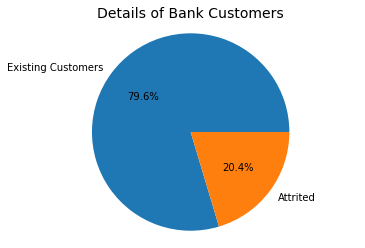

In [ ]:
#Visualizing the target variable i.e. Exited

target = df["Exited"].value_counts()
fig1, ax1 = plt.subplots()
ax1.pie(target, labels=['Existing Customers','Attrited'], autopct='%1.1f%%', shadow=None)
ax1.axis('equal')
plt.title("Details of Bank Customers", fontsize=14)
plt.show()

**Dropping Irrelevant Feature**

*   *CustomerID* is unique appears to be the unique system identifier generated and would not add any value our analysis. So, we can drop the same.
*   *Surname* is demographic information and doesn't really add value in identifying if the customer will continue with the bank.

In [ ]:
df.drop(["CustomerId","Surname"], axis=1, inplace=True)

In [ ]:
df1=pd.read_csv(inputPath, header=0)

**Feature : Age**

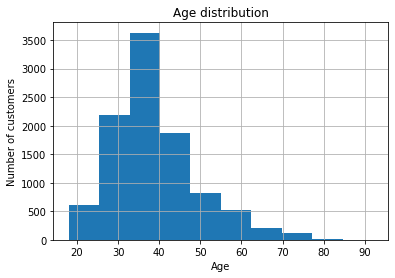

In [ ]:
df["Age"].hist()
plt.xlabel("Age")
plt.ylabel("Number of customers")
plt.title("Age distribution", fontsize=12)
plt.show()

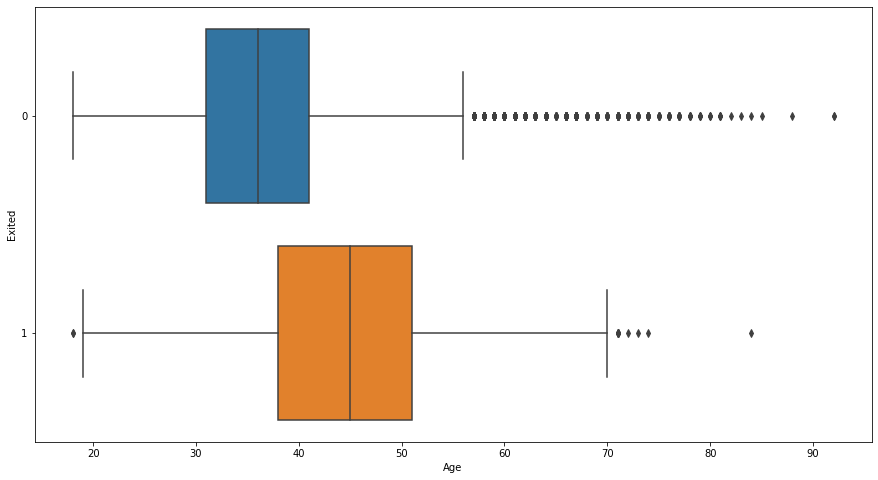

In [ ]:
plt.figure(figsize=(15, 8))
sns.boxplot(x=df1.Age, y=df1.Exited, orient='h')

**Observation**

From the above box plot, we can see that mostly older people (age>35) are the one who churns.

**Feature : Geography**


Text(0.5, 1.0, 'Churn rate by Geography')

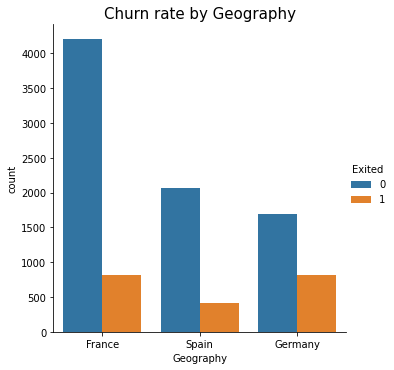

In [ ]:
sns.catplot(x='Geography', hue='Exited', data=df1, kind='count')
plt.title('Churn rate by Geography',fontsize=15)

In [ ]:
# print("France Customers detail:\n",df[df['Geography']==0]['Exited'].value_counts())
# print("Germany Customers detail:\n",df[df['Geography']==1]['Exited'].value_counts())
# print("Spain Customers detail:\n",df[df['Geography']==2]['Exited'].value_counts())

**Observation**

Germany and France have more number of exits. For non chun customers France is leading.

**Feature : CreditScore**

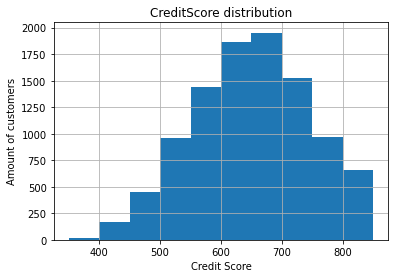

In [ ]:
df["CreditScore"].hist()
plt.xlabel("Credit Score")
plt.ylabel("Amount of customers")
plt.title("CreditScore distribution", fontsize=12)
plt.show()

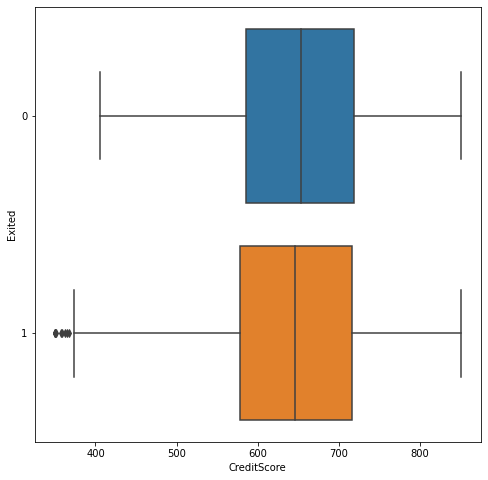

In [ ]:
plt.figure(figsize=(8, 8))
sns.boxplot(x=df1.CreditScore, y=df1.Exited, orient='h')

**Observation**

Boxes are overlapping, there appears to be no visible relation between credit score and churn/exited.


**Feature : Tenure**

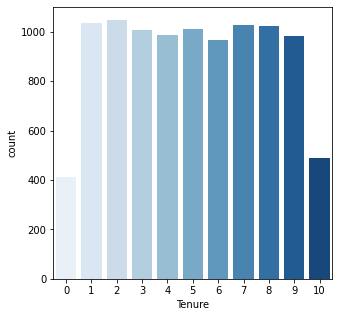

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(x=df['Tenure'], palette='Blues')
plt.show()

Text(0.5, 1.0, 'Churn rate by Tenure')

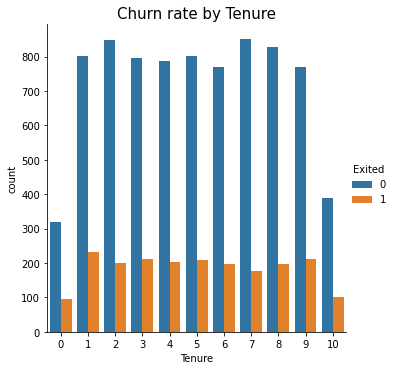

In [ ]:
sns.catplot(x='Tenure', hue='Exited', data=df1, kind='count')
plt.title('Churn rate by Tenure',fontsize=15)

**Observation**
* Data shows that there are only around 5% (500) customers that are associated with Bank for 10 years or more.
* Few records have tenure less than 1 year, this is possibly due to new customers.
* Visually we cannot say that if tenure years matters or not  when it comes to churn.

**Feature : NumOfProducts**

In [ ]:
df.NumOfProducts.value_counts()  

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

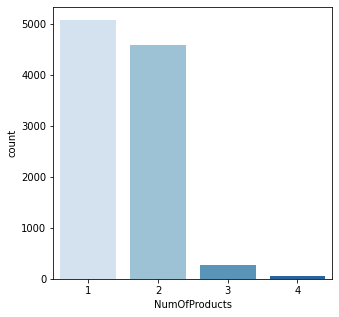

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(x=df['NumOfProducts'], palette='Blues')
plt.show()

Text(0.5, 1.0, 'Churn rate by NumOfProducts')

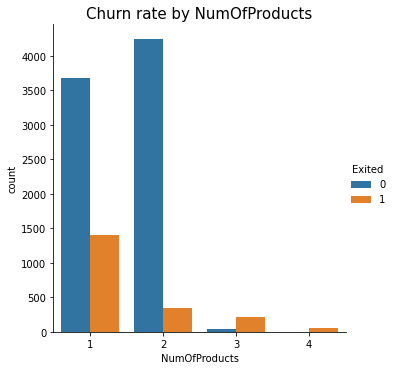

In [ ]:
sns.catplot(x='NumOfProducts', hue='Exited', data=df1, kind='count')
plt.title('Churn rate by NumOfProducts',fontsize=15)

**Observation**

* Most customers have 1 product from the bank followed by customers with 2 products.
There are very few customers with 3 or more products.

* Among the churn customers, the rate of those who use one product is very high with followed by those who use two products and so on.


**Feature : HasCrCard**

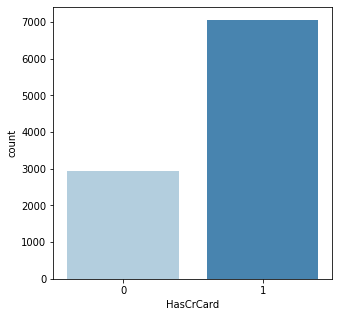

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(x=df['HasCrCard'], palette='Blues')
plt.show()

Text(0.5, 1.0, 'Churn rate by HasCrCard')

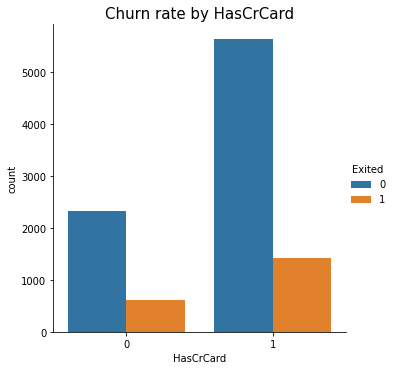

In [ ]:
sns.catplot(x='HasCrCard', hue='Exited', data=df1, kind='count')
plt.title('Churn rate by HasCrCard',fontsize=15)

**Observation**

* Majority of customers have Credit Card.
* Customers who have credit card have more exits in comparison to those who donot have card.

**Feature : IsActiveMember**

In [ ]:
df.IsActiveMember.value_counts()  

1    5151
0    4849
Name: IsActiveMember, dtype: int64

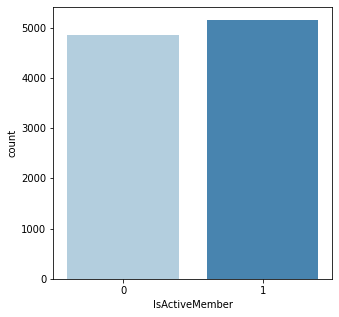

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(x=df['IsActiveMember'], palette='Blues')
plt.show()

Text(0.5, 1.0, 'Churn rate by IsActiveMember')

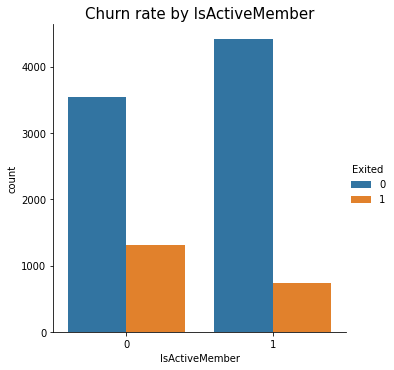

In [ ]:
sns.catplot(x='IsActiveMember', hue='Exited', data=df1, kind='count')
plt.title('Churn rate by IsActiveMember',fontsize=15)

**Observation**

Active members are less likely to exit.

**Feature : Gender**

In [ ]:
# #Male and Female customers details w.r.t Exited feature
# Sex_0=df[df['Gender']=='Male']['Exited'].value_counts()
# print("Male Customers detail:\n",df[df['Gender']==0]['Exited'].value_counts())

# Sex_1=df[df['Gender']=='Female']['Exited'].value_counts()
# print("Female Customers detail:\n",df[df['Gender']==1]['Exited'].value_counts())

Text(0.5, 1.0, 'Churn rate by Gender')

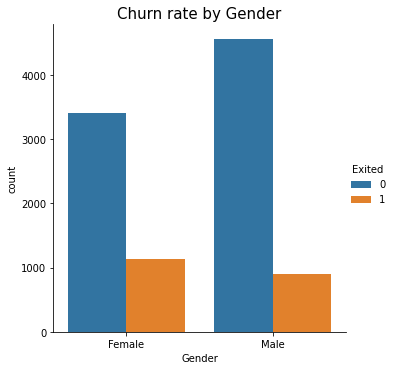

In [ ]:
sns.catplot(x='Gender', hue='Exited', data=df1, kind='count')
plt.title('Churn rate by Gender',fontsize=15)

**Observation**

Female customers are more likely to churn.


---



***Correlation plot***



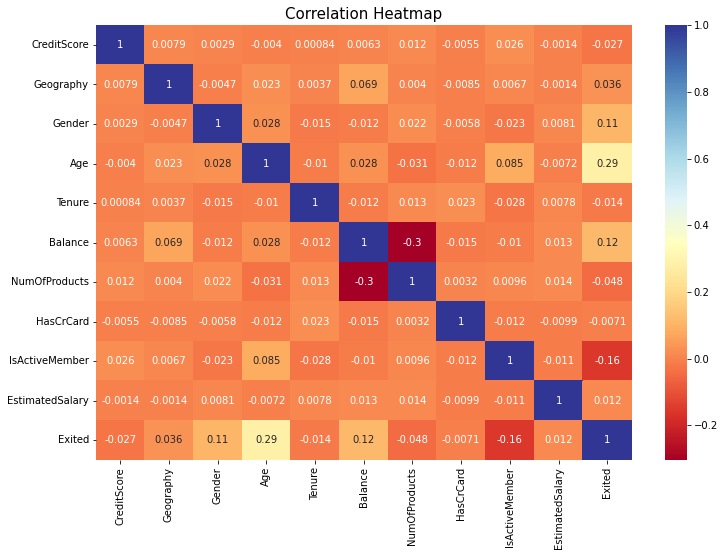

In [ ]:
df['Gender'].replace({'Male':0, 'Female':1}, inplace=True)
df['Geography'].replace({'France':0,'Germany':1,'Spain':2}, inplace=True)
corr = df.corr()
plt.figure(figsize=(12,8))
plt.title('Correlation Heatmap', fontsize=15)
sns.heatmap(corr, cmap='RdYlBu', annot=True)

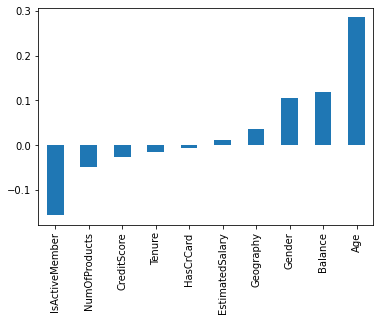

In [ ]:
df.corr()['Exited'][:-1].sort_values().plot(kind='bar')

* There appears to be very less correlation among features. And no multicollinearity which is good.
* The “Age”, “Balance”, and “Gender” columns are positively correlated with customer churn (“Exited”). There is a negative correlation between being an active member (“IsActiveMember”) and customer churn.

### Data Preprocessing

In [ ]:
df1.drop(labels=['CustomerId','Surname'], axis=1, inplace=True)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')
# passing bridge-types-cat column (label encoded values of bridge_types)
enc_df = pd.DataFrame(enc.fit_transform(df1[['Geography','Gender']]).toarray(),columns=['Geography_France', 'Geography_Germany','Geography_Spain','Gender_Female','Gender_Male'])
# merge with main df bridge_df on key values
df1 = df1.join(enc_df)
df1

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0,1.0,0.0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0,1.0,0.0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0,1.0,0.0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0,1.0,0.0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,1.0,0.0,0.0,0.0,1.0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,1.0,0.0,0.0,0.0,1.0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1.0,0.0,0.0,1.0,0.0
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,0.0,1.0,0.0,0.0,1.0


In [ ]:
y= df1['Exited']    #target variable

In [ ]:
#Storing categorical variable separately
cat_df = df1[["Geography_Germany", "Geography_France","Geography_Spain", "Gender_Male","Gender_Female" ,"HasCrCard","IsActiveMember"]]

#Storing continuous variable
X= df1.drop(labels=["Exited","Geography_France","Geography_Germany","Geography_Spain", "Gender_Female","Gender_Male" ,"HasCrCard","IsActiveMember","Geography","Gender"],axis=1)



In [ ]:
cols = X.columns
index = X.index

In [ ]:
#scaling the continuous variables
from sklearn.preprocessing import RobustScaler
#Robust Scaling is used here
transformer = RobustScaler().fit(X)
X = transformer.transform(X)
X = pd.DataFrame(X, columns = cols, index = index)
X = pd.concat([X,cat_df], axis = 1)
X.head(10)

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Geography_Germany,Geography_France,Geography_Spain,Gender_Male,Gender_Female,HasCrCard,IsActiveMember
0,-0.246269,0.416667,-0.75,-0.761480,0.0,0.011739,0.0,1.0,0.0,0.0,1.0,1,1
1,-0.328358,0.333333,-1.00,-0.104906,0.0,0.125512,0.0,0.0,1.0,0.0,1.0,0,1
2,-1.119403,0.416667,0.75,0.489346,2.0,0.139630,0.0,1.0,0.0,0.0,1.0,1,0
3,0.350746,0.166667,-1.00,-0.761480,1.0,-0.064717,0.0,1.0,0.0,0.0,1.0,0,0
4,1.477612,0.500000,-0.75,0.221806,0.0,-0.214561,0.0,0.0,1.0,0.0,1.0,1,1
5,-0.052239,0.583333,0.75,0.129714,1.0,0.503758,0.0,0.0,1.0,1.0,0.0,1,0
6,1.268657,1.083333,0.50,-0.761480,1.0,-0.916096,0.0,1.0,0.0,1.0,0.0,1,1
7,-2.059701,-0.666667,-0.25,0.139828,3.0,0.194671,1.0,0.0,0.0,0.0,1.0,1,0
8,-1.126866,0.583333,-0.25,0.351387,1.0,-0.256677,0.0,1.0,0.0,1.0,0.0,0,1
9,0.238806,-0.833333,-0.75,0.293044,0.0,-0.289352,0.0,1.0,0.0,1.0,0.0,1,1


**Finding out feature importance**

In order to find out which features are important, I am going to train the model using the Random Forest classifier.

In [ ]:
# Import the Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#Perform training on the Random Forest model and generate the importance of the features
features_label = X.columns
forest = RandomForestClassifier (n_estimators = 10000, random_state = 0, n_jobs = -1)
forest.fit(X, y)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

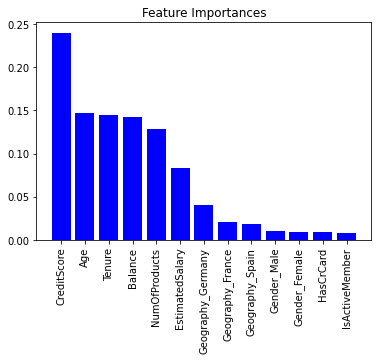

In [ ]:
# Visualization of the Feature importances
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], color = "blue", align = "center")
plt.xticks(range(X.shape[1]), features_label, rotation = 90)
plt.show()

The graph above shows the features with the highest importance value to the lowest importance value. It shows the most important features are creditscore, age, tenure, balance and so on.

### Build and train ensemble model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# Splitting the dataset into the Training set(80%) and Test set(20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10101)

In [ ]:
#using SMOTE(Synthetic Minority Oversampling)Technique
#from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=12)
X_res, y_res = sm.fit_resample(X_train, y_train)

SMOTE is applied to create synthetic data points of minority class samples, then using ENN the data points on the border or boundary are removed to increase the separation of the two classes.

In [ ]:
#Defining the machine learning models (weak learners)
def get_models():
  models = list()
  #C-Inverse of regularization strength
  models.append(('lr', LogisticRegression(C=0.1,random_state = 10101)))
  models.append(('cart',DecisionTreeClassifier(max_depth=15)))
  models.append(('knn', KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)))
  models.append(('svm', SVC(probability=True, kernel='poly', degree=3, C=0.01)))
  models.append(('bayes', GaussianNB()))
  return models

In [ ]:
# function to evaluate each base/weak model
def evaluate_models(models, X_train, X_val, y_train, y_val):
  # fit and evaluate the models
  scores = list()
  for name, model in models:
    model.fit(X_train, y_train)
    yhat = model.predict(X_val)
    acc = accuracy_score(y_val, yhat)
    scores.append(acc)
  return scores

In [ ]:
# combine the base models
models = get_models()
# fit and evaluate each model
scores = evaluate_models(models, X_res, X_test, y_res, y_test)
print(scores)
# create the ensemble model
ensemble = VotingClassifier(estimators=models, voting='soft', weights=scores)
# fit the ensemble on the training dataset
ensemble.fit(X_res, y_res)
# make predictions on test set
yhat = ensemble.predict(X_test)
# evaluate predictions
score = accuracy_score(y_test, yhat)
print('Weighted Avg Accuracy: %.3f' % (score*100))


# pre_score = precision_score(y_test, yhat)
# print("Precision: ",pre_score)
# rec_score = recall_score(y_test, yhat)                            
# print("Recall: ",rec_score)
# f_score = f1_score(y_test, yhat, average='weighted')
# print("f1_score: ",f_score)

[0.702, 0.756, 0.7605, 0.732, 0.728]
Weighted Avg Accuracy: 78.500


In [ ]:
#K-Fold Cross Validation:
kfold = model_selection.KFold(n_splits=10)
results = model_selection.cross_val_score(ensemble, X_res, y_res, cv=kfold)
print(results.mean())

0.8230902597370464


K-Fold Cross Validation ensures that every observation from the original dataset has the chance of appearing in training and test set.
(Here 10 fold cross validation is used here)

### Saving ensemble model

In [ ]:
# import pickle
# #save scaler 
# pickle.dump(transformer, open("transformer.pickle", "wb"))

# #save model
# pickle.dump(ensemble, open("model.pickle", "wb"))

### Prediction of new data

In [ ]:
#load the model 
import pickle
model = pickle.load(open("model.pickle","rb"))
transformers = pickle.load(open("transformer.pickle","rb"))

In [ ]:
#new data to be predicted
data=[411,'France','Male',29,0,59697.17,2,1,1,53483.21]
data  = pd.DataFrame(data).T
data.columns = ["CreditScore","Geography","Gender","Age","Tenure","Balance","NumOfProducts","HasCrCard","IsActiveMember","EstimatedSalary"]
#data

In [ ]:
#function to preprocess single data point
def preprocess(data):
    if(data['HasCrCard'][0] == 'Yes'):
        data['HasCrCard'][0]= 1
    else:
        data['HasCrCard'][0]= 0
    
    if(data['IsActiveMember'][0] == 'Yes'):
        data['IsActiveMember'][0]= 1
    else:
        data['IsActiveMember'][0]= 0
        
    geo = []
    if(data['Geography'][0] == "France"):
        geo = [0.0,1.0,0.0]
    elif(data['Geography'][0] == "Spain"):
        geo = [0.0,0.0,1.0]
    elif(data['Geography'][0] == "Germany"):
        geo = [1.0,0.0,0.0]
    
    gender = []
    if(data['Gender'][0] == 'Female'):
        gender = [0.0,1.0]
    elif(data['Gender'][0] == 'Male'):
        gender = [1.0,0.0]
        
    
    onhot_data = geo + gender
    onhot_data = pd.DataFrame(onhot_data).T
    onhot_data.columns = ['Geography_Germany','Geography_France','Geography_Spain','Gender_Male','Gender_Female']
    data = data.join(onhot_data)
    
    cat_df = data[["Geography_Germany", "Geography_France","Geography_Spain", "Gender_Male","Gender_Female" ,"HasCrCard","IsActiveMember"]]
    
    X= data.drop(labels=["Geography_France","Geography_Germany","Geography_Spain", "Gender_Female","Gender_Male" ,"HasCrCard","IsActiveMember","Geography","Gender"],axis=1)
    cols = X.columns
    index = X.index
    X = transformers.transform(X)
    X = pd.DataFrame(X, columns = cols, index = index)
    X = pd.concat([X,cat_df], axis = 1)
    
    prediction_val = []
    for i in range(len(X.columns)):
        prediction_val.append(X.iloc[0][i])
    prediction_val = [prediction_val]
    return prediction_val

In [ ]:
y=preprocess(data)
#prediction
pred=model.predict(y)
prediction=pred[0]
#print("Predicted Class:", prediction)

print("Will customer leave the bank?")
if prediction == 1:
  print('Yes, the customer will leave the bank soon.')
elif prediction == 0:
  print('No, the customer is happy with bank services.')
print("\n") 
print("---------------------------------------------------------")

Will customer leave the bank?
No, the customer is happy with bank services.


---------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  "X does not have val